In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/Dataset/project home credit/application_clean.csv')
print(df.shape)  # Harusnya (307511, ...) kalau full

(307511, 16)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SK_ID_CURR           307511 non-null  int64  
 1   TARGET               307511 non-null  int64  
 2   NAME_CONTRACT_TYPE   307511 non-null  object 
 3   CODE_GENDER          307511 non-null  object 
 4   FLAG_OWN_CAR         307511 non-null  object 
 5   FLAG_OWN_REALTY      307511 non-null  object 
 6   CNT_CHILDREN         307511 non-null  int64  
 7   AMT_INCOME_TOTAL     307511 non-null  float64
 8   AMT_CREDIT           307511 non-null  float64
 9   AMT_ANNUITY          307511 non-null  float64
 10  AMT_GOODS_PRICE      307511 non-null  float64
 11  NAME_TYPE_SUITE      307511 non-null  object 
 12  NAME_INCOME_TYPE     307511 non-null  object 
 13  NAME_EDUCATION_TYPE  307511 non-null  object 
 14  NAME_FAMILY_STATUS   307511 non-null  object 
 15  NAME_HOUSING_TYPE

# TARGET Distribution

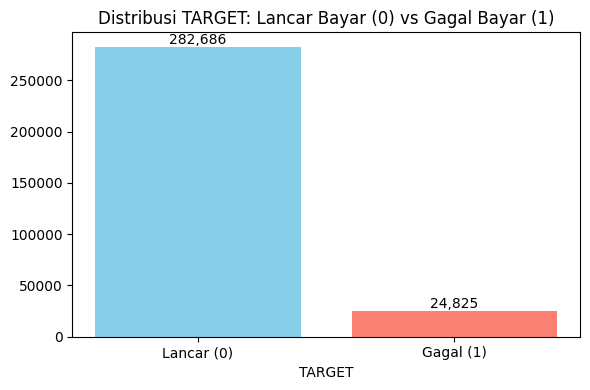

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# TARGET distribution
target_counts = df['TARGET'].value_counts().sort_index()

# Plot bar chart
plt.figure(figsize=(6,4))
bars = plt.bar(target_counts.index, target_counts.values, color=['skyblue', 'salmon'])

# label addition
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:,}', ha='center', va='bottom', fontsize=10)

# title
plt.title('Distribusi TARGET: Lancar Bayar (0) vs Gagal Bayar (1)')
plt.xlabel('TARGET')
plt.xticks([0, 1], ['Lancar (0)', 'Gagal (1)'])

plt.tight_layout()
plt.show()

<Figure size 600x400 with 0 Axes>

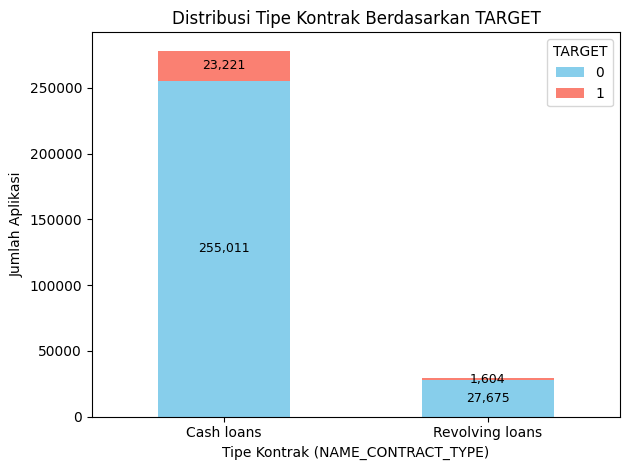

In [ ]:
# Contract and TARGET
contract_target_counts = df.groupby(['NAME_CONTRACT_TYPE', 'TARGET']).size().unstack(fill_value=0)

# Plot stacked bar chart
plt.figure(figsize=(6,4))
bars = contract_target_counts.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], edgecolor='none')

# title
plt.title('Distribusi Tipe Kontrak Berdasarkan TARGET')
plt.xlabel('Tipe Kontrak (NAME_CONTRACT_TYPE)')
plt.ylabel('Jumlah Aplikasi')
plt.xticks(rotation=0)

# bar segment
for container in bars.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            bars.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f'{int(height):,}',
                ha='center',
                va='center',
                fontsize=9,
                color='black'
            )

plt.tight_layout()
plt.show()

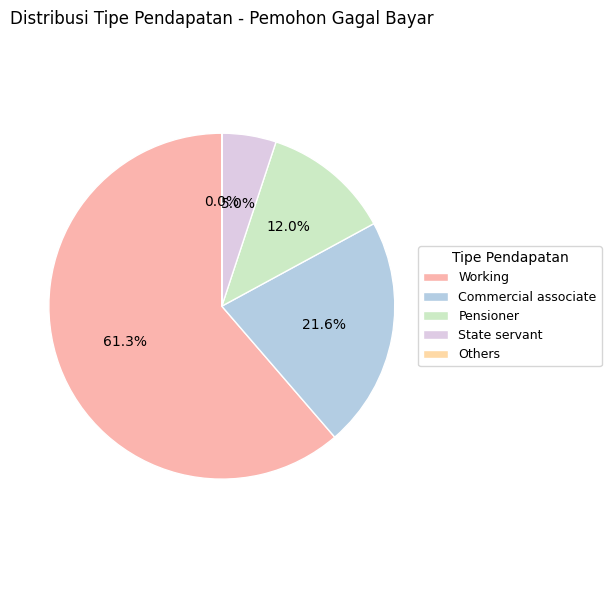

In [ ]:
# high rist
df_default = df[df['TARGET'] == 1]

# 'Others'
income_type = df_default['NAME_INCOME_TYPE'].replace({
    'Unemployed': 'Others',
    'Maternity leave': 'Others'
})

# distribution
income_counts = income_type.value_counts()

# Plot pie chart
fig, ax = plt.subplots(figsize=(6,6))
wedges, texts, autotexts = ax.pie(
    income_counts,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Pastel1.colors,
    wedgeprops={'edgecolor': 'white'}
)

# legends
ax.legend(
    wedges,
    income_counts.index,
    title='Tipe Pendapatan',
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    fontsize=9
)

# title
plt.title('Distribusi Tipe Pendapatan - Pemohon Gagal Bayar', fontsize=12)
plt.axis('equal')
plt.tight_layout()
plt.show()


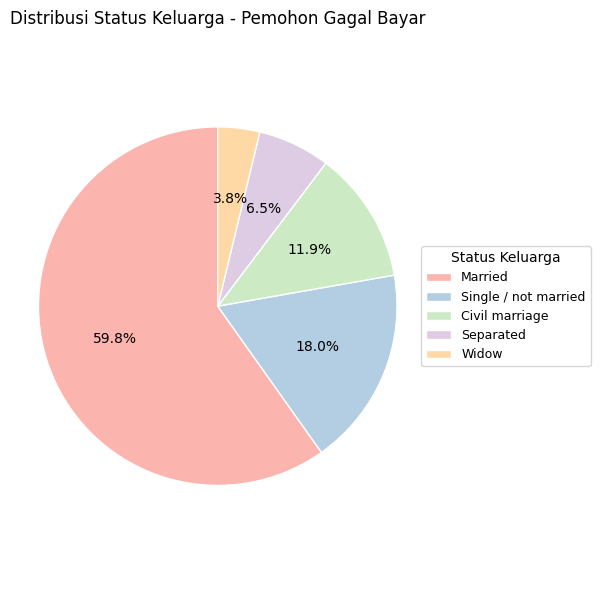

In [ ]:
import matplotlib.pyplot as plt

# Filter hanya pemohon gagal bayar
df_default = df[df['TARGET'] == 1]

# Hitung distribusi status keluarga
family_counts = df_default['NAME_FAMILY_STATUS'].value_counts()

# Plot pie chart
fig, ax = plt.subplots(figsize=(6,6))
wedges, texts, autotexts = ax.pie(
    family_counts,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Pastel1.colors,
    wedgeprops={'edgecolor': 'white'}
)

# Tambahkan legenda di luar chart
ax.legend(
    wedges,
    family_counts.index,
    title='Status Keluarga',
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    fontsize=9
)

# Judul dan tampilan bersih
plt.title('Distribusi Status Keluarga - Pemohon Gagal Bayar', fontsize=12)
plt.axis('equal')
plt.tight_layout()
plt.show()


<Axes: xlabel='TARGET', ylabel='count'>

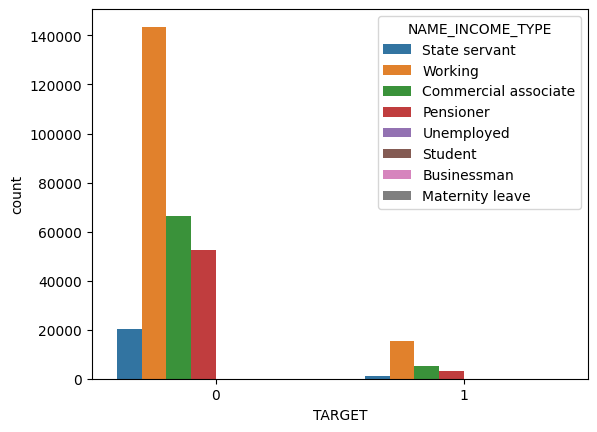

In [ ]:
sns.countplot(x='TARGET', hue='NAME_INCOME_TYPE', data=df)

# Amount Credit

In [ ]:
df.groupby('TARGET')['AMT_CREDIT'].describe()


,count,mean,std,min,25%,50%,75%,max
TARGET,,,,,,,,
0,282686.0,602648.282002,406845.907710,45000.0,270000.0,517788.0,810000.0,4050000.0
1,24825.0,557778.527674,346433.235646,45000.0,284400.0,497520.0,733315.5,4027680.0


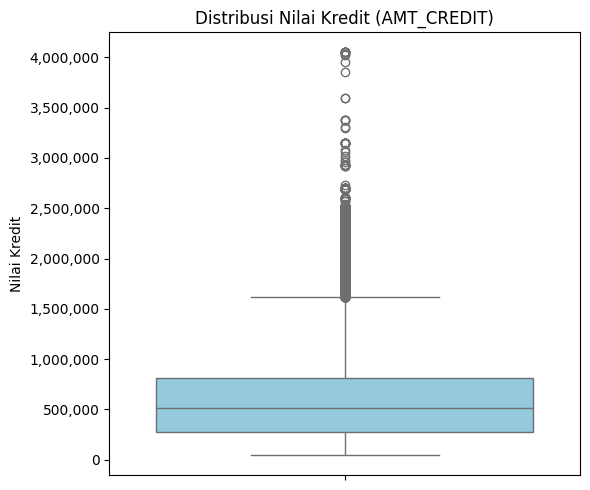

In [ ]:
# Ukuran plot
plt.figure(figsize=(6,5))

# Boxplot
sns.boxplot(y=df['AMT_CREDIT'], color='skyblue')

# Label dan judul
plt.title('Distribusi Nilai Kredit (AMT_CREDIT)')
plt.ylabel('Nilai Kredit')

# Format angka biasa (non-scientific)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{int(y):,}'))

plt.tight_layout()
plt.show()


In [ ]:
Q1 = df['AMT_CREDIT'].quantile(0.25)
Q3 = df['AMT_CREDIT'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outlier
outliers = df[(df['AMT_CREDIT'] < lower_bound) | (df['AMT_CREDIT'] > upper_bound)]

print(f"Jumlah outlier: {len(outliers):,}")


Jumlah outlier: 6,562


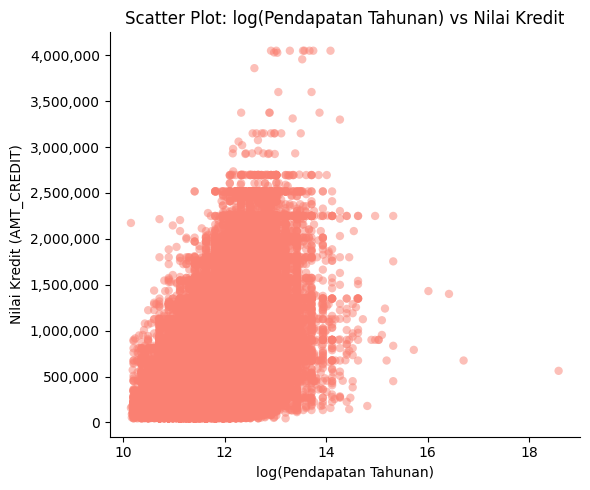

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Transform
df['LOG_INCOME'] = np.log1p(df['AMT_INCOME_TOTAL'])  # log1p

# Plot scatter
plt.figure(figsize=(6,5))
plt.scatter(df['LOG_INCOME'], df['AMT_CREDIT'], color='salmon', alpha=0.5, edgecolors='none')

# Label 
plt.title('Scatter Plot: log(Pendapatan Tahunan) vs Nilai Kredit')
plt.xlabel('log(Pendapatan Tahunan)')
plt.ylabel('Nilai Kredit (AMT_CREDIT)')

# Format
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{int(y):,}'))

# grid
plt.grid(False)
for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

plt.tight_layout()
plt.show()


# Korelasi

In [ ]:
df = df.drop(columns='SK_ID_CURR')

<Axes: >

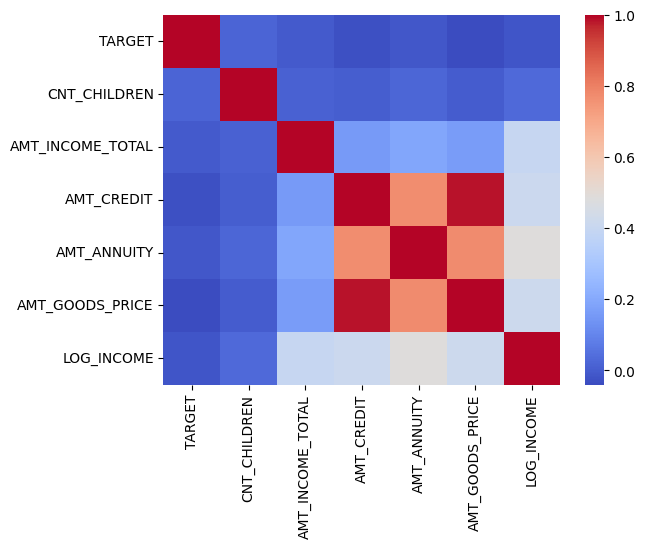

In [ ]:
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm')